In [462]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Hotel Reservations data

In [463]:
df=pd.read_csv('hotel_booking.csv')

In [464]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [465]:
df.drop(columns=['email','name','phone-number','credit_card'],axis=1, inplace=True)

        ## For deleting column 'axis=1' is used & for making chages in dataframe 'inplace=True' is used

In [466]:
df.shape

(119390, 32)

In [467]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [468]:
df.info() #for checking datatypes and non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [469]:
## since reservation_status_date data type is object we will convert this into data-time format

In [470]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [471]:
df.describe() ##getting stats regarding the data

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [472]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [473]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('.'*75)


hotel
['Resort Hotel' 'City Hotel']
...........................................................................
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
...........................................................................
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
...........................................................................
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 

In [474]:
df.isnull().sum()    ## it will show the missing values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [475]:
df.drop(['company','agent'], axis=1, inplace=True)
df.dropna(inplace=True) ##for removing all the missing values

In [476]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [477]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<Axes: >

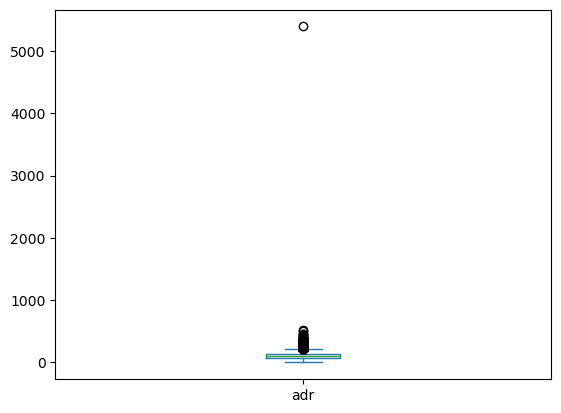

In [478]:
df['adr'].plot(kind='box') #using box plot for detecting outliers

In [479]:
df= df[df['adr']<5000] #removing/filtering out outliers

## Data Analysis and Visualizations

In [480]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True)  
#value_counts returns category name and its frequency in the column , normalize to return percentage
cancelled_perc

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

In [481]:
## 63.8 % of reservations are not cancelled
## 37.1 % of reservations are cancelled (almost half of the reservations)

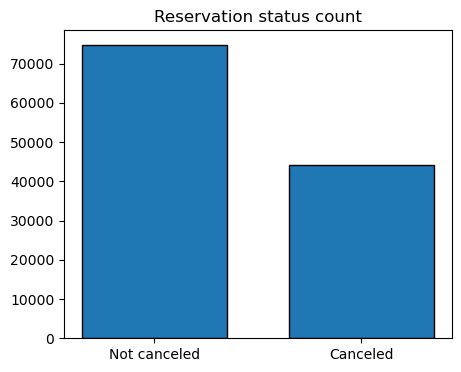

In [482]:
plt.figure(figsize=(5,4))
plt.title("Reservation status count")
plt.bar(['Not canceled','Canceled'],df['is_canceled'].value_counts(),edgecolor='k',width=0.7) ##removing normalize since we need exact count
plt.show()

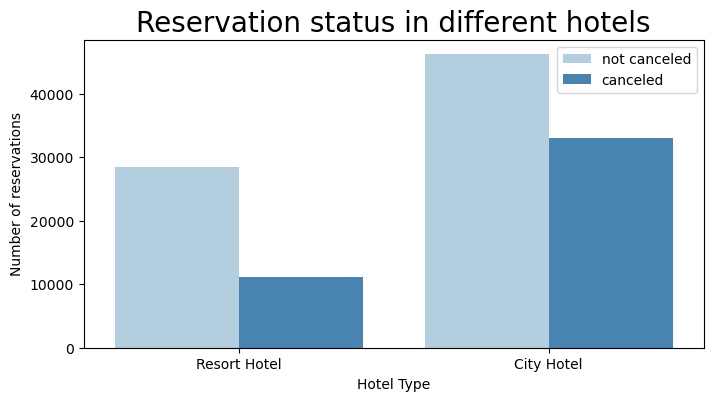

In [502]:
plt.figure(figsize=(8,4))
ax1=sns.countplot(x = 'hotel', hue = 'is_canceled', data=df, palette = 'Blues')
legend_labels , _ = ax1. get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status in different hotels' , size = 20)
plt.xlabel('Hotel Type')
plt.ylabel('Number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()

In [484]:
resort_hotel = df[df['hotel']== 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [485]:
city_hotel = df[df['hotel']== 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [486]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean() #will get error if we put single '[]' bracket
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

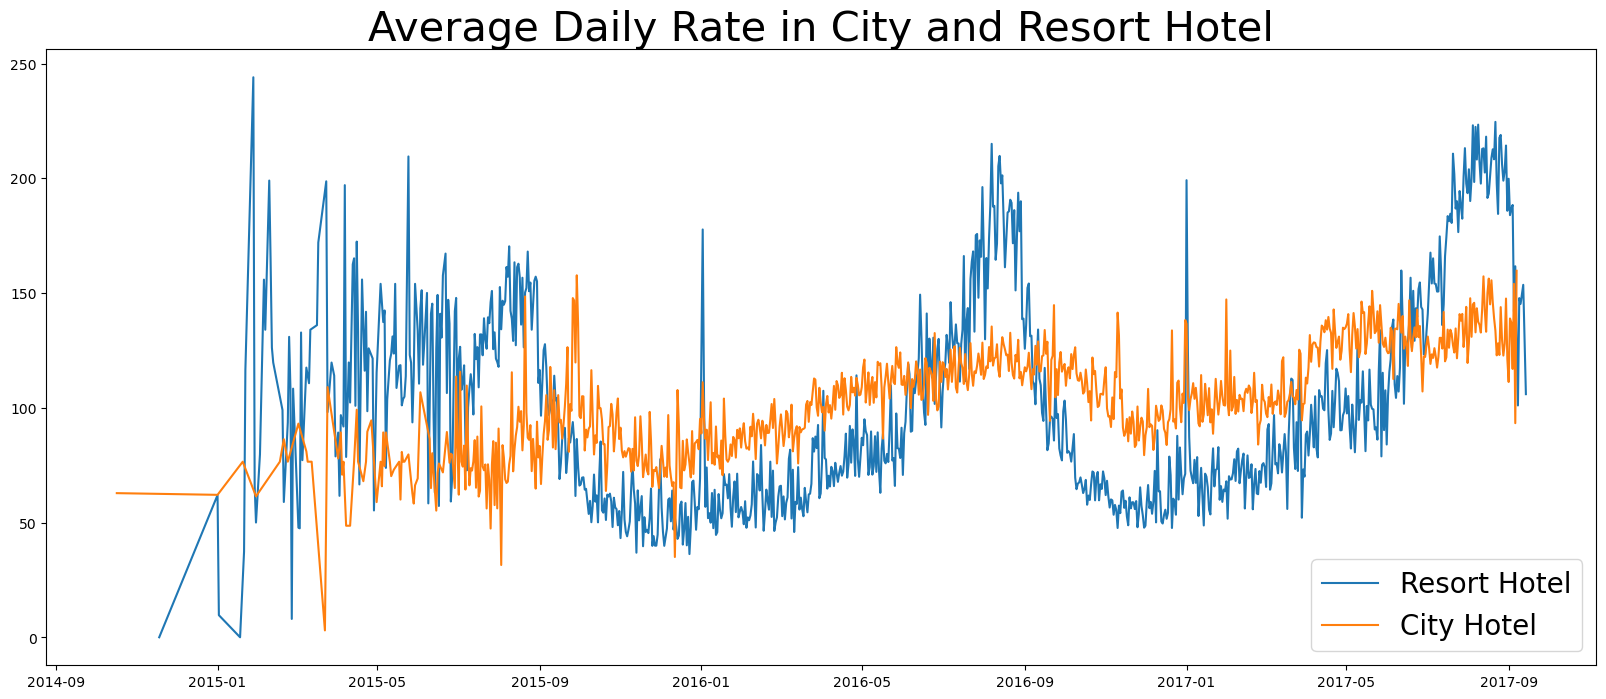

In [487]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize=30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label='Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label='City Hotel')
plt.legend(fontsize = 20)
plt.show()

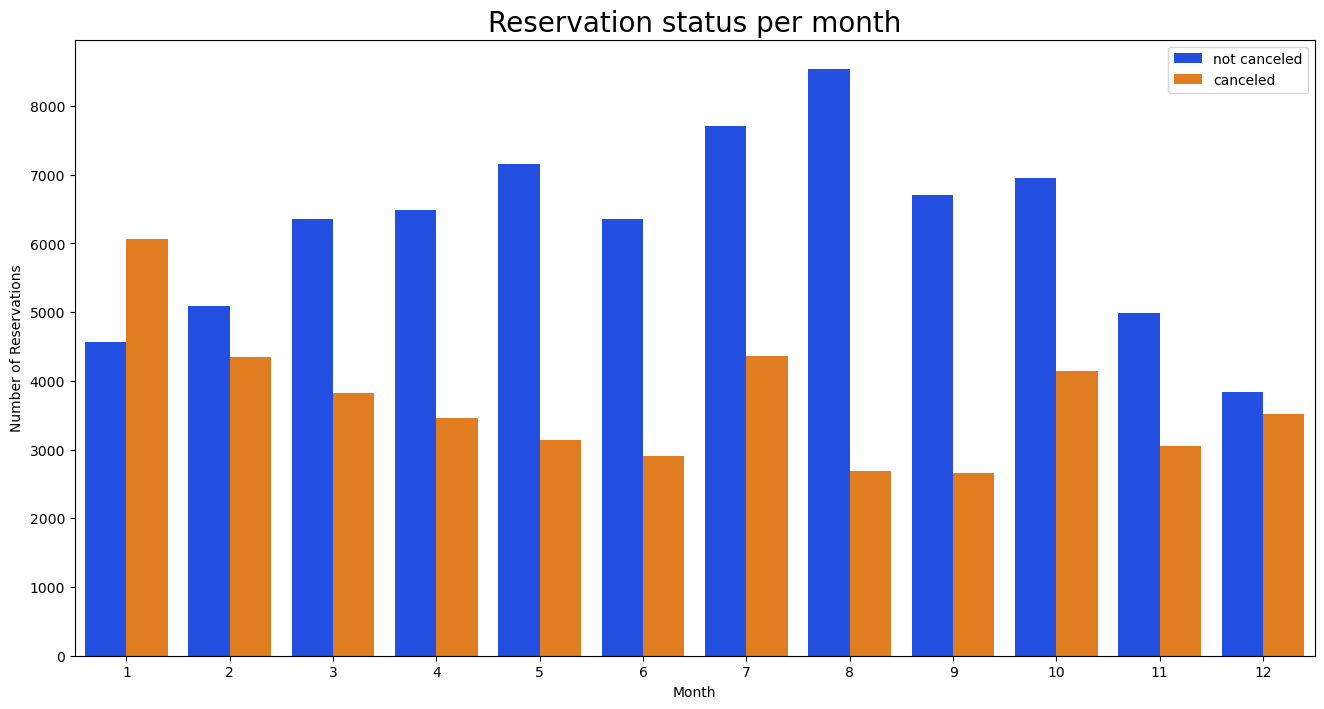

In [498]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
ax1=sns.countplot(x = 'month' , hue = 'is_canceled', data=df ,palette = 'bright')
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status per month' , size = 20)
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.legend(['not canceled','canceled'])
plt.show()


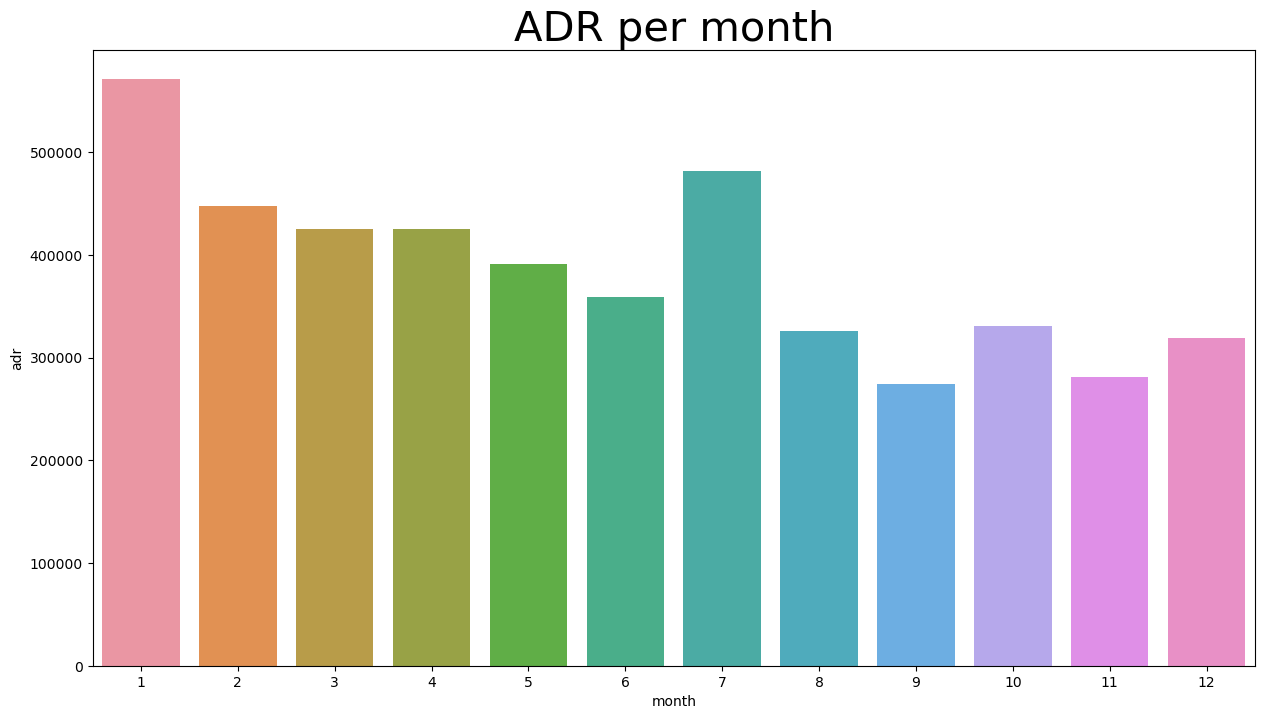

In [504]:
plt.figure(figsize=(15,8))
plt.title("ADR per month", fontsize = 30)
sns.barplot(x='month',y='adr', data = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.show()

###    From the above two graph we can conclude:
### 1. In the month of September the Prices were lowest hence low cancellation rate
### 2. In the month of January the Prices were Higest hence High cancellation rate


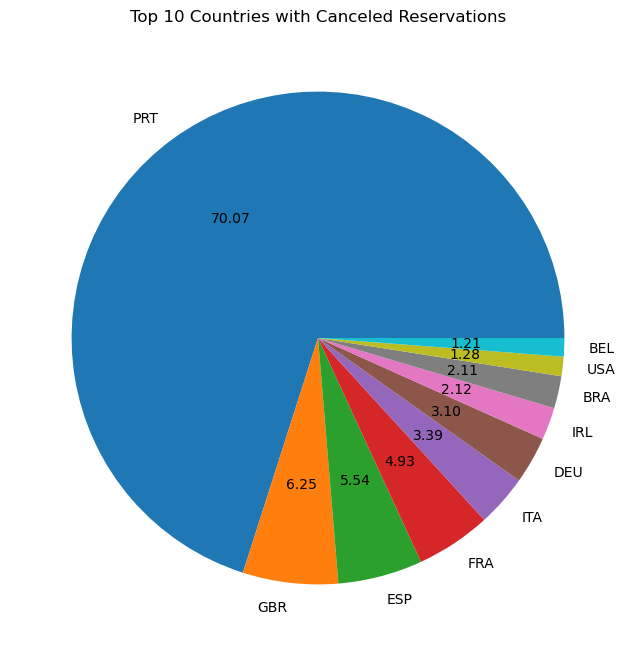

In [509]:
cancelled_data = df[df['is_canceled'] ==1]
top_10_countries = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 Countries with Canceled Reservations')
plt.pie(top_10_countries, autopct = '%.2f', labels = top_10_countries.index)
plt.show()

### Pourtugal has the Higest calcellation rate

In [512]:
df['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [513]:
df['market_segment'].value_counts(normalize=True)*100 

Online TA        47.437698
Offline TA/TO    20.319268
Groups           16.658116
Direct           10.469566
Corporate         4.298679
Complementary     0.617341
Aviation          0.199332
Name: market_segment, dtype: float64

### Online TA get more customers/reservations as compared to Direct Reservations

In [514]:
cancelled_data['market_segment'].value_counts(normalize=True)*100 


Online TA        46.969560
Groups           27.398532
Offline TA/TO    18.746603
Direct            4.348614
Corporate         2.215075
Complementary     0.203841
Aviation          0.117775
Name: market_segment, dtype: float64

### Cancellation in Reservations is also more for TA as compared to Direct

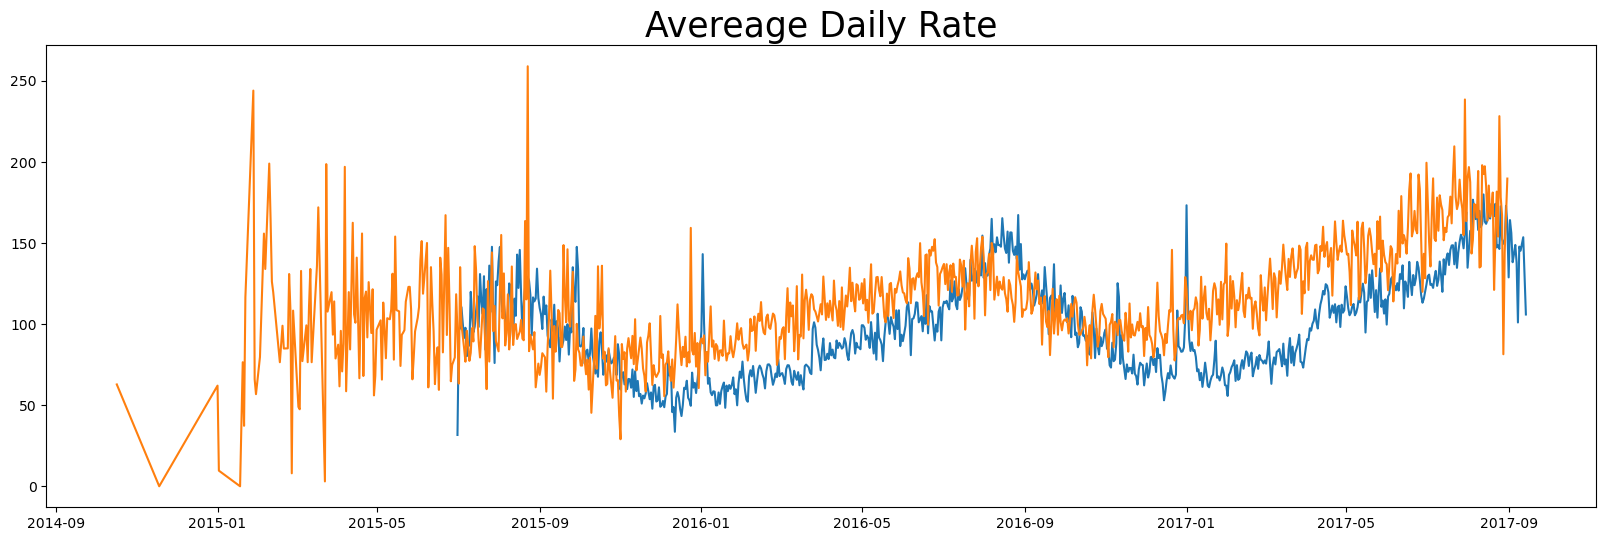

In [519]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date',inplace=True)


not_cancelled_data = df[df['is_canceled'] ==0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date',inplace=True)

plt.figure(figsize=(20,6))
plt.title('Avereage Daily Rate',fontsize = 25)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'],label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label='cancelled')
plt.show()

In [528]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date'] > '2016') & (cancelled_df_adr['reservation_status_date'] < '2017-09')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date'] > '2016') & (not_cancelled_df_adr['reservation_status_date'] < '2017-09')]

# Filtering out from 2016 to 2017 September

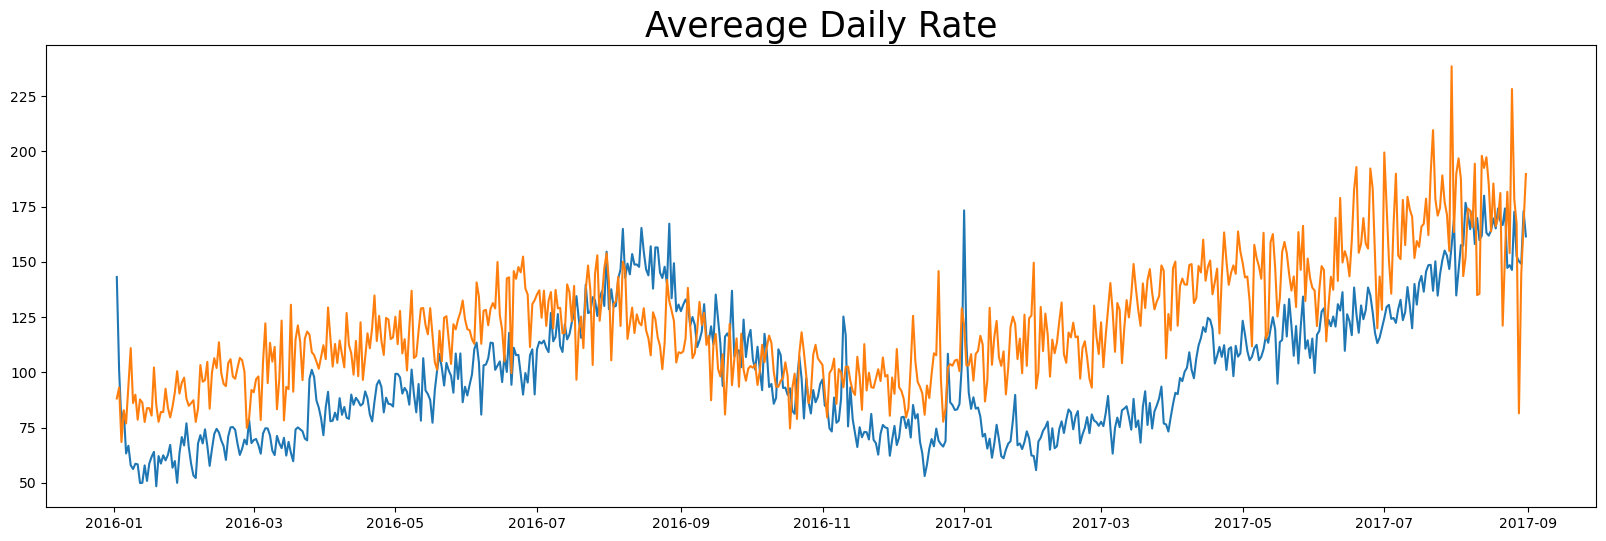

In [529]:
plt.figure(figsize=(20,6))
plt.title('Avereage Daily Rate',fontsize = 25)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'],label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label='cancelled')
plt.show()